In [ ]:
*K-Means Clustering

In [41]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
#loading the dataset
clusters= pd.read_csv('Mall_Customers.csv')

In [43]:
clusters.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [45]:
#making a copy of the orginal dataset
clusters_copy= clusters.copy()

In [46]:
#
clusters_copy.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [47]:
#
clusters_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
clusters_copy.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

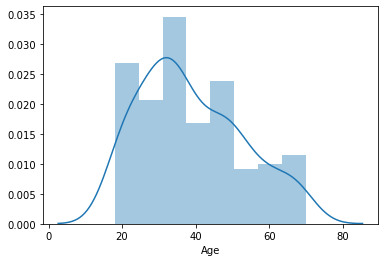

In [49]:
#let's create a distplot to check out how is their distriibution
sns.distplot(clusters_copy.Age);

*Using the Elbow methodto find the optimal the number of Clusters

In [50]:
#
x_feature=clusters_copy.iloc[:, [3, 4]].values

In [51]:
x_feature.shape

(200, 2)

* using the machine learning algorithm sklearn.kmeans for clusters

In [52]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 10 ):
    kmeans_clusters= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans_clusters.fit(x_feature)
    wcss.append(kmeans_clusters.inertia_)

* Plotting the Elbow method graph  

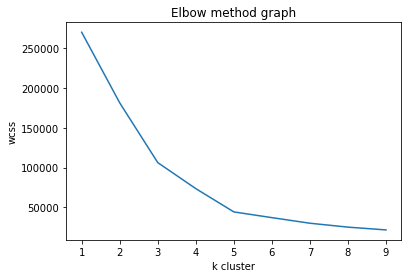

In [53]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method graph')
plt.xlabel('k cluster')
plt.ylabel('wcss')
plt.show()

In [54]:
* Train the k-means model on the dataset by creating only 3 clusters

SyntaxError: invalid syntax (<ipython-input-54-edfbe1a28b37>, line 1)

In [55]:
kmeans_clusters= KMeans(n_clusters= 5, init= 'k-means++', random_state= 42)
y_pred=kmeans_clusters.fit_predict(x_feature)

In [56]:
#seeing the y_pred
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


I can say the 1rst customer belong to cluster 0, the second customer belongs to 

Time to visualise the top five clusters

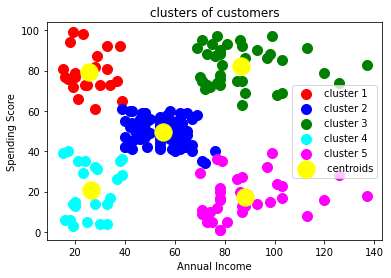

In [59]:
plt.scatter(x_feature[y_pred== 0,0], x_feature[y_pred==0, 1], s= 100, c= 'red', label= 'cluster 1')
plt.scatter(x_feature[y_pred== 1,0], x_feature[y_pred==1, 1], s= 100, c= 'blue', label= 'cluster 2')
plt.scatter(x_feature[y_pred== 2,0], x_feature[y_pred==2, 1], s= 100, c= 'green', label= 'cluster 3')
plt.scatter(x_feature[y_pred== 3,0], x_feature[y_pred==3, 1], s= 100, c= 'cyan', label= 'cluster 4')
plt.scatter(x_feature[y_pred== 4,0], x_feature[y_pred==4, 1], s= 100, c= 'magenta', label= 'cluster 5')

plt.scatter(kmeans_clusters.cluster_centers_[:, 0], kmeans_clusters.cluster_centers_[:,1], s= 300, c='yellow', label=' centroids')
plt.title('clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()